# Fiscal Transparency: An Analysis of Government Finance Statistics

### Proposal Motivation:

    In this project, we delve into the realm of government finance, an area pivotal to understanding the economic health and fiscal policies of a nation. Through the analysis of government finance statistics, this study aims to uncover trends, assess fiscal responsibility, and offer insights into how government financial decisions impact overall economic stability. Utilizing datasets that encapsulate various aspects of government finance, we will employ data analytics techniques to paint a comprehensive picture of fiscal operations. This exploration is not just about numbers; it's about unraveling the story behind government spending and revenue, providing a clearer view of fiscal management's role in shaping economic landscapes.

### Data Source:

   https://www.stats.govt.nz/large-datasets/csv-files-for-download/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
naggfs_data = pd.read_csv('C:\\Users\\Victor Pessoa\\Downloads\\naggfs-jun-2023.csv')
nalgfs_data = pd.read_csv('C:\\Users\\Victor Pessoa\\Downloads\\nalgfs-jun-2023.csv')
nacgfs_data = pd.read_csv('C:\\Users\\Victor Pessoa\\Downloads\\nacgfs-jun-2023.csv')

In [4]:
print("NAGGFS Data Overview:")
print(naggfs_data.head())
print(naggfs_data.info())
print("\n")

print("NALGFS Data Overview:")
print(nalgfs_data.head())
print(nalgfs_data.info())
print("\n")

print("NACGFS Data Overview:")
print(nacgfs_data.head())
print(nacgfs_data.info())
print("\n")

# Checking for missing values
print("Missing values in NAGGFS Data:")
print(naggfs_data.isnull().sum())
print("\n")

print("Missing values in NALGFS Data:")
print(nalgfs_data.isnull().sum())
print("\n")

print("Missing values in NACGFS Data:")
print(nacgfs_data.isnull().sum())
print("\n")

NAGGFS Data Overview:
   Series_reference   Period  Data_value   STATUS    UNITS  MAGNTUDE  \
0  GFSA.SGS01G01Z90  2009.06        3846  REVISED  Dollars         6   
1  GFSA.SGS01G01Z90  2010.06       -3348  REVISED  Dollars         6   
2  GFSA.SGS01G01Z90  2011.06      -13174  REVISED  Dollars         6   
3  GFSA.SGS01G01Z90  2012.06       -3409  REVISED  Dollars         6   
4  GFSA.SGS01G01Z90  2013.06        -351  REVISED  Dollars         6   

                                 Subject  \
0  Government Financial Statistics - GFS   
1  Government Financial Statistics - GFS   
2  Government Financial Statistics - GFS   
3  Government Financial Statistics - GFS   
4  Government Financial Statistics - GFS   

                                               Group         Series_title_1  \
0  General Government, Operating Statement, Net B...  Net operating balance   
1  General Government, Operating Statement, Net B...  Net operating balance   
2  General Government, Operating Statement,

The output indicates significant missing values in the Series_title_2, Series_title_3, Series_title_4, and Series_title_5 columns across all datasets. I need to decide how to handle these. If these columns are not crucial for your analysis, I might start dropping them.

In [5]:
columns_to_drop = ['Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5']
naggfs_data.drop(columns=columns_to_drop, inplace=True)
nalgfs_data.drop(columns=columns_to_drop, inplace=True)
nacgfs_data.drop(columns=columns_to_drop, inplace=True)

print("Missing values after dropping columns in NAGGFS Data:")
print(naggfs_data.isnull().sum())
print("\n")

print("Missing values after dropping columns in NALGFS Data:")
print(nalgfs_data.isnull().sum())
print("\n")

print("Missing values after dropping columns in NACGFS Data:")
print(nacgfs_data.isnull().sum())
print("\n")

Missing values after dropping columns in NAGGFS Data:
Series_reference    0
Period              0
Data_value          0
STATUS              0
UNITS               0
MAGNTUDE            0
Subject             0
Group               0
Series_title_1      0
dtype: int64


Missing values after dropping columns in NALGFS Data:
Series_reference    0
Period              0
Data_value          0
STATUS              0
UNITS               0
MAGNTUDE            0
Subject             0
Group               0
Series_title_1      0
dtype: int64


Missing values after dropping columns in NACGFS Data:
Series_reference    0
Period              0
Data_value          0
STATUS              0
UNITS               0
MAGNTUDE            0
Subject             0
Group               0
Series_title_1      0
dtype: int64




It looks like after dropping the columns with a high number of missing values, there are no missing values left in your datasets (NAGGFS, NALGFS, and NACGFS). This means each of these datasets is now clean and ready for further analysis.

This code will provide basic insights into the distribution of key variables and identify patterns or trends in the datasets:

Descriptive Statistics for NAGGFS Data:
            Period     Data_value  MAGNTUDE
count  2513.000000    2513.000000    2513.0
mean   2016.034532   22654.412256       6.0
std       4.337951   58112.712715       0.0
min    2008.060000  -19712.000000       6.0
25%    2012.060000     225.000000       6.0
50%    2016.060000    2356.000000       6.0
75%    2020.060000   14336.000000       6.0
max    2023.060000  673539.000000       6.0


Descriptive Statistics for NALGFS Data:
            Period     Data_value  MAGNTUDE
count  2498.000000    2498.000000    2498.0
mean   2016.034380    5970.521617       6.0
std       4.338056   22105.501009       0.0
min    2008.060000   -4063.000000       6.0
25%    2012.060000       0.000000       6.0
50%    2016.060000     171.000000       6.0
75%    2020.060000    1974.250000       6.0
max    2023.060000  203220.000000       6.0


Descriptive Statistics for NACGFS Data:
            Period     Data_value  MAGNTUDE
count  2513.000000    2513.000000    251

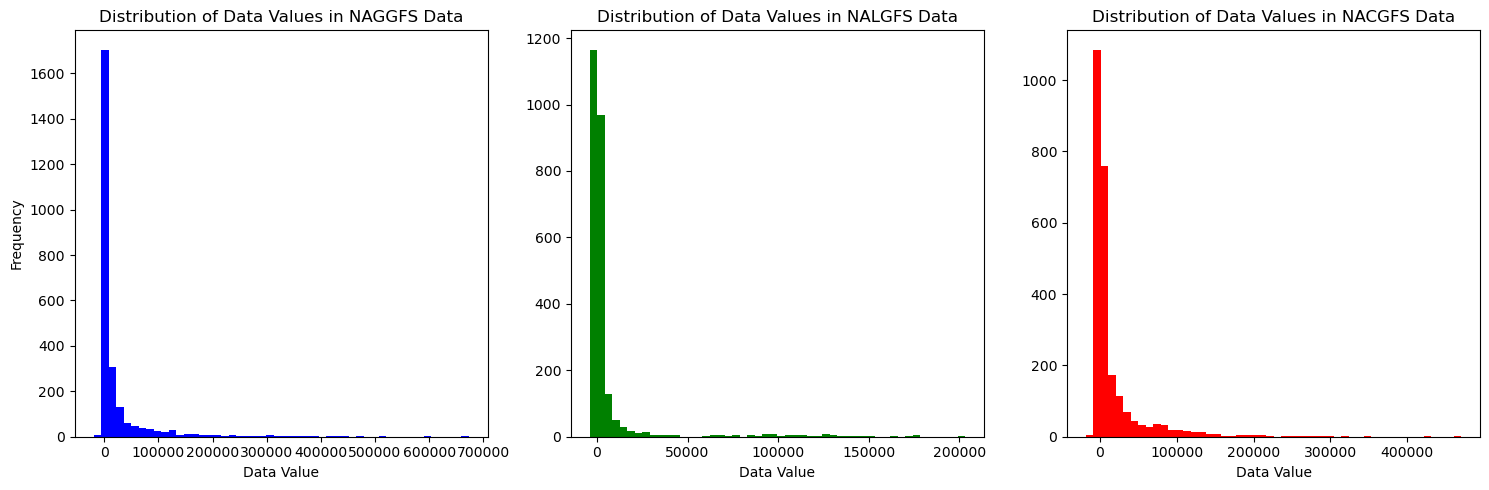

In [6]:
print("Descriptive Statistics for NAGGFS Data:")
print(naggfs_data.describe())
print("\n")

print("Descriptive Statistics for NALGFS Data:")
print(nalgfs_data.describe())
print("\n")

print("Descriptive Statistics for NACGFS Data:")
print(nacgfs_data.describe())
print("\n")

# Exploring the distribution of 'Data_value' in each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(naggfs_data['Data_value'], bins=50, color='blue')
plt.title('Distribution of Data Values in NAGGFS Data')
plt.xlabel('Data Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(nalgfs_data['Data_value'], bins=50, color='green')
plt.title('Distribution of Data Values in NALGFS Data')
plt.xlabel('Data Value')

plt.subplot(1, 3, 3)
plt.hist(nacgfs_data['Data_value'], bins=50, color='red')
plt.title('Distribution of Data Values in NACGFS Data')
plt.xlabel('Data Value')

plt.tight_layout()
plt.show()

The descriptive statistics I've obtained provide a valuable overview of each dataset:

    NAGGFS Data: Shows a wide range in Data_value with a mean of 22,654 and a maximum value of 673,539. This suggests a significant variance in the data.

    NALGFS Data: The average Data_value is lower at 5,970, with a smaller maximum value of 203,220, indicating a different scale or type of financial transactions compared to NAGGFS.

    NACGFS Data: Similar to NAGGFS in terms of range and mean value, with an average of 16,811 and a maximum of 470,318.
    
The standard deviation in all datasets is quite high, indicating a wide spread of data. The Period column spans from around 2008 to 2023 in all datasets, providing a good timeframe for trend analysis.

This code will plot the trend of Data_value over time for each dataset:

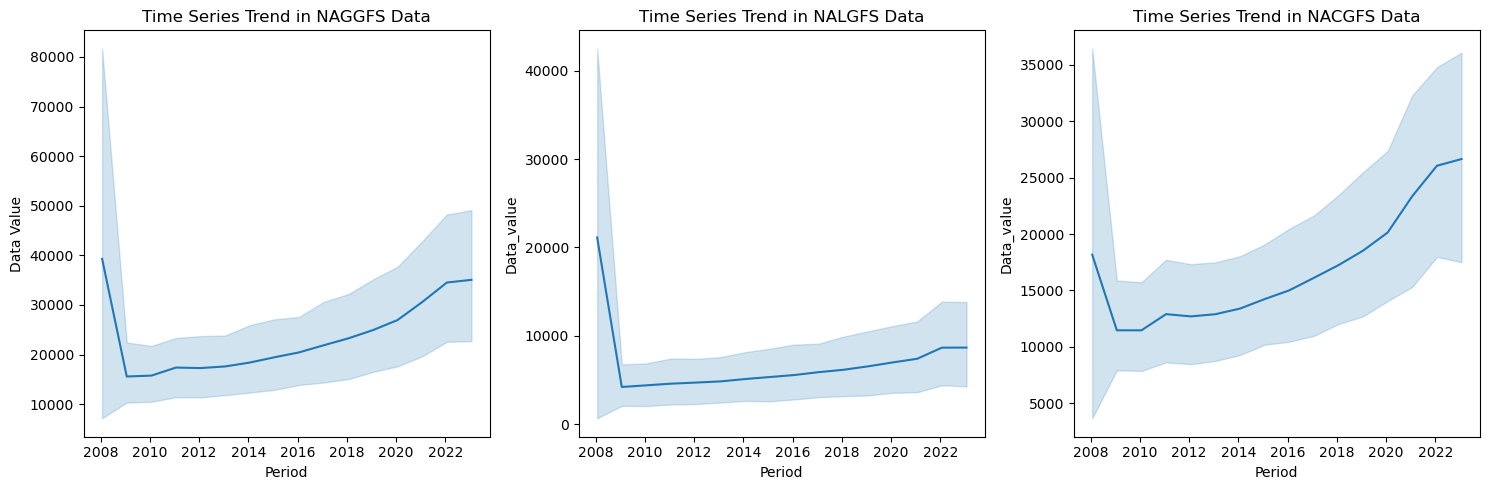

In [8]:
plt.figure(figsize=(15, 5))

# NAGGFS Data Trend
plt.subplot(1, 3, 1)
sns.lineplot(x='Period', y='Data_value', data=naggfs_data)
plt.title('Time Series Trend in NAGGFS Data')
plt.xlabel('Period')
plt.ylabel('Data Value')

# NALGFS Data Trend
plt.subplot(1, 3, 2)
sns.lineplot(x='Period', y='Data_value', data=nalgfs_data)
plt.title('Time Series Trend in NALGFS Data')
plt.xlabel('Period')

# NACGFS Data Trend
plt.subplot(1, 3, 3)
sns.lineplot(x='Period', y='Data_value', data=nacgfs_data)
plt.title('Time Series Trend in NACGFS Data')
plt.xlabel('Period')

plt.tight_layout()
plt.show()

To analyze correlations between variables (e.g., between Data_value and Period or other numerical variables),I will use this code:

In [10]:
# Correlation in NAGGFS Data
print("Correlation Matrix for NAGGFS Data:")
print(naggfs_data.corr())
print("\n")

# Correlation in NALGFS Data
print("Correlation Matrix for NALGFS Data:")
print(nalgfs_data.corr())
print("\n")

# Correlation in NACGFS Data
print("Correlation Matrix for NACGFS Data:")
print(nacgfs_data.corr())
print("\n")

Correlation Matrix for NAGGFS Data:
              Period  Data_value  MAGNTUDE
Period      1.000000    0.100604       NaN
Data_value  0.100604    1.000000       NaN
MAGNTUDE         NaN         NaN       NaN


Correlation Matrix for NALGFS Data:
              Period  Data_value  MAGNTUDE
Period      1.000000    0.056808       NaN
Data_value  0.056808    1.000000       NaN
MAGNTUDE         NaN         NaN       NaN


Correlation Matrix for NACGFS Data:
              Period  Data_value  MAGNTUDE
Period      1.000000    0.115157       NaN
Data_value  0.115157    1.000000       NaN
MAGNTUDE         NaN         NaN       NaN




To segment the data, for example by Group, and analyze Data_value within each segment:

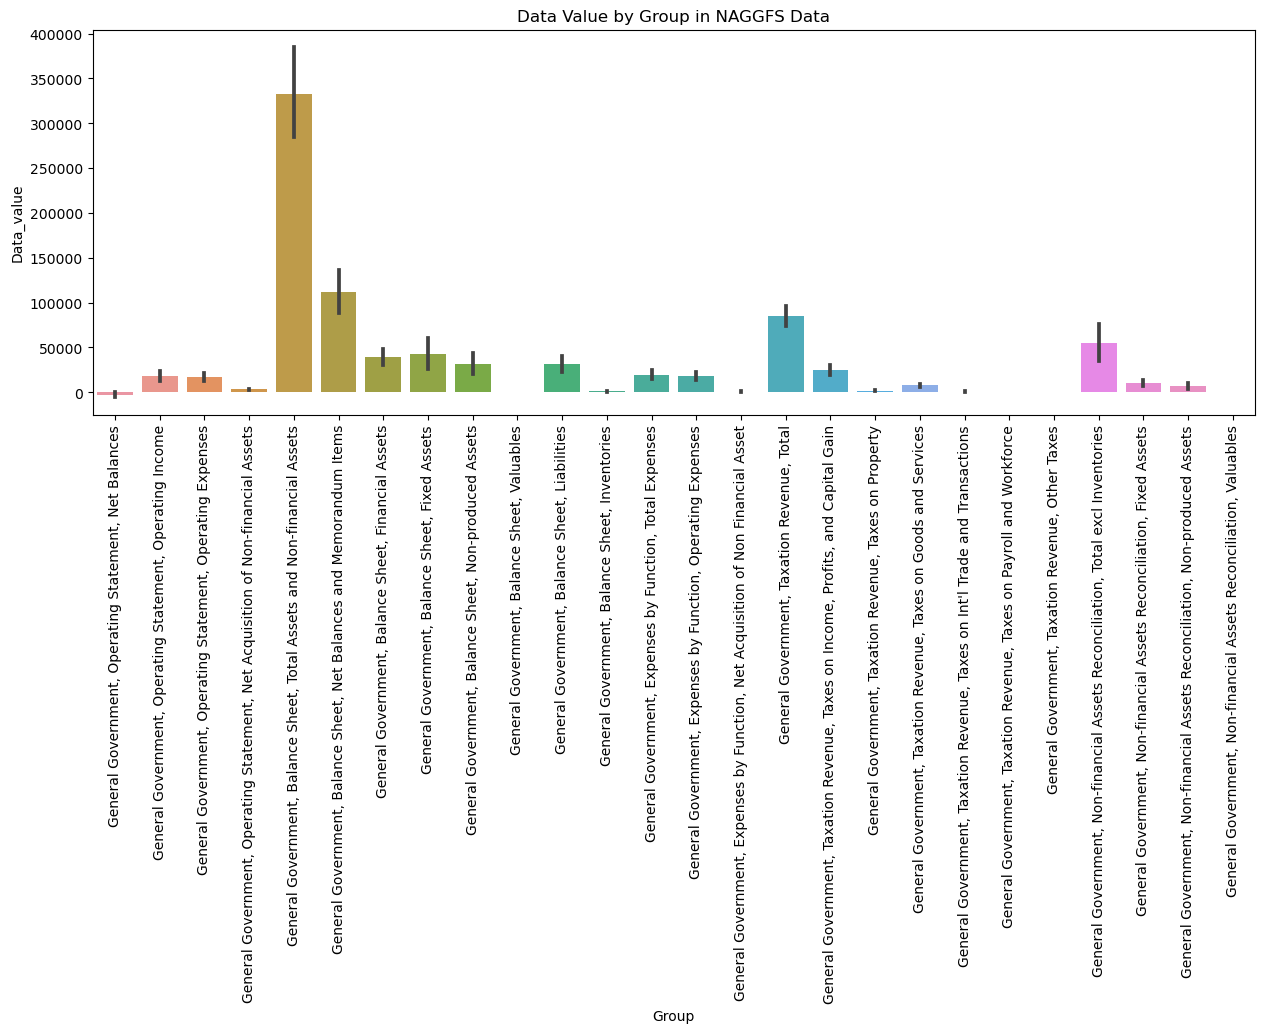

In [11]:
# Segmentation Analysis in NAGGFS Data
plt.figure(figsize=(15, 5))
sns.barplot(x='Group', y='Data_value', data=naggfs_data)
plt.title('Data Value by Group in NAGGFS Data')
plt.xticks(rotation=90)
plt.show()

### Interpretation of Descriptive Statistics and Data Distributions
The descriptive statistics and histograms of the datasets reveal significant insights. In NAGGFS Data, the wide range and high standard deviation in `Data_value` suggest large fluctuations in financial figures, possibly indicating varying scales of government transactions over different periods. Similarly, NALGFS and NACGFS Data show variability in financial figures but with different scales and spread. These variations might reflect differing economic activities or fiscal policies over the years.


### Time Series Analysis Interpretation
The time series plots indicate notable trends in government finance data over time. In NAGGFS Data, there is a noticeable fluctuation in `Data_value`, which may reflect economic cycles or changes in fiscal policy. NALGFS Data shows a more stable trend, while NACGFS Data indicates some years with significant deviations. These trends provide insights into how external factors like economic conditions or policy changes might impact government finances.

### Correlation Analysis Interpretation
The correlation matrices show a mild correlation between `Period` and `Data_value` in all datasets, suggesting some level of change in financial figures over time. However, the lack of strong correlation indicates that other factors, possibly external economic conditions or specific government policies, play a significant role in determining these financial outcomes.


### Segmentation Analysis Interpretation
The segmentation analysis of NAGGFS Data, as visualized in the bar plots, highlights differences in `Data_value` across various groups. This variation could be attributed to the different scopes and scales of government operations within each group. Understanding these differences is key to analyzing the effectiveness and impact of different government sectors or initiatives.

## Conclusion and Future Work
##### This analysis has provided valuable insights into government finance statistics, highlighting trends, variability, and potential impacts of economic conditions and policies. Future work could involve a deeper analysis of the causative factors behind these trends, or a comparative study with other countries' financial data to contextualize these findings within a global framework.
